# Apple Quality
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

In [1]:
import kaggle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve,accuracy_score



In [2]:
# Descargar el dataset utilizando la API de Kaggle
custom_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data'
kaggle.api.dataset_download_files('nelgiriyewithana/apple-quality', path=custom_path, unzip=True)
files = os.listdir(custom_path)
print("Archivos descargados de Kaggle:", files)


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
Archivos descargados de Kaggle: ['apple_quality.csv', 'Churn_Modelling.csv']


In [3]:
# Declarar DF
file_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data\apple_quality.csv'
df = pd.read_csv(file_path)
print(df.head())


   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


In [4]:
# Tamaño del DF
print(f"El tamaño del dataset es {df.shape}")

El tamaño del dataset es (4001, 9)


In [5]:
# Tipos de datos y composición de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
# Filas con valores faltantes
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)


      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


In [7]:
# Manejo valor NaN
df = df.dropna()

In [8]:
# Cambio tipo de datos
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['A_id'] = df['A_id'].astype('object')

In [9]:
# Verificación DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   object 
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
df.describe() 

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [11]:
# Target
print("Valores únicos en 'Quality':", df['Quality'].unique())

Valores únicos en 'Quality': ['good' 'bad']


In [12]:
# Normalización de variables cuantitativas
# Paso 1: Seleccionar columnas de tipo float
float_columns = df.select_dtypes(include=['float64']).columns

# Paso 2: Normalizar solo las columnas de tipo float
scaler = StandardScaler(with_std=True, with_mean=True)
X_float_normalized = scaler.fit_transform(df[float_columns])

# Convertir a DataFrame
df_float_normalized = pd.DataFrame(X_float_normalized, columns=float_columns)

# Paso 3: Combinar las columnas normalizadas con el resto del DataFrame
df_normalized = df.copy()  
df_normalized[float_columns] = df_float_normalized 

# Validar las medias cercanas a 0 y varianzas cercanas a 1
Medias = df_normalized[float_columns].mean(axis=0)
Var = df_normalized[float_columns].var(axis=0)

# Mostrar resultados
print(f"Medias después de la normalización:\n{Medias}")
print(f"Desviación después de la normalización:\n{Var}")


Medias después de la normalización:
Size           4.440892e-17
Weight        -1.154632e-17
Sweetness     -3.019807e-17
Crunchiness    1.421085e-17
Juiciness     -2.708944e-17
Ripeness      -3.552714e-18
Acidity       -2.131628e-17
dtype: float64
Desviación después de la normalización:
Size           1.00025
Weight         1.00025
Sweetness      1.00025
Crunchiness    1.00025
Juiciness      1.00025
Ripeness       1.00025
Acidity        1.00025
dtype: float64


<Axes: xlabel='Quality'>

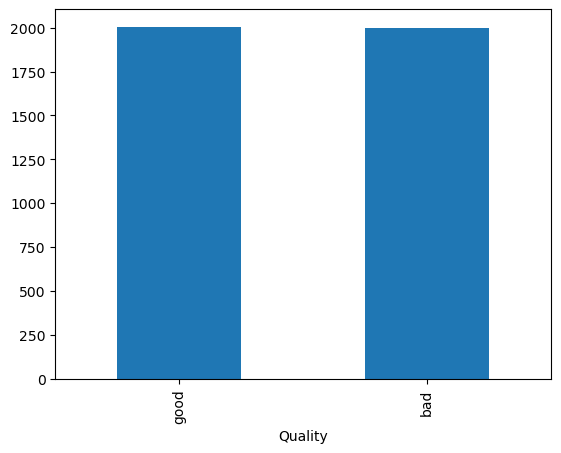

In [13]:
df['Quality'].value_counts().plot(kind = 'bar')

In [27]:
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0}).astype(int)

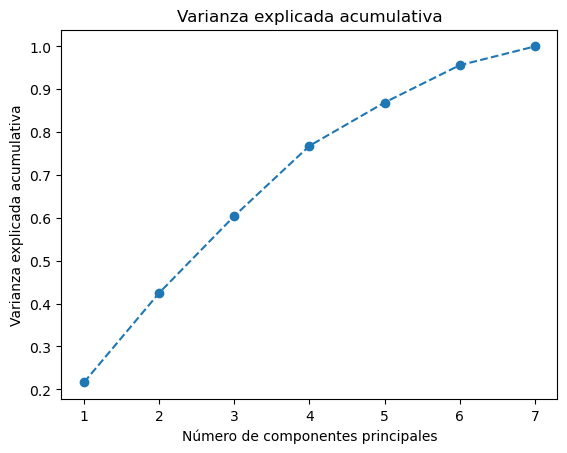

In [28]:
# Algoritmo No Supervisado (PCA)
pca = PCA()
principal_components = pca.fit_transform(X_float_normalized)
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza explicada acumulativa
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()


In [29]:
n_components = 4 # Defino la cantidad de componente en función de la regla del "codo"
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_float_normalized)

# Datos reducidos a la cantidad de componentes principales que se definio previamente
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [30]:
varianza_explicada = (pca.explained_variance_ratio_[0:3].sum())*100
print(f"La varianza explicada es: {varianza_explicada} %")

La varianza explicada es: 60.423489903620734 %


In [31]:
# Variables y cargas en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=df_float_normalized.columns)
loadings_abs = loadings.abs()
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)
print("Cargas de variables en cada componente principal:")
print(top_loadings)

Cargas de variables en cada componente principal:
         PC1          PC2          PC3          PC4
0   Ripeness         Size       Weight       Weight
1    Acidity  Crunchiness    Juiciness    Sweetness
2  Juiciness    Sweetness     Ripeness  Crunchiness
3  Sweetness    Juiciness         Size    Juiciness
4       Size      Acidity  Crunchiness      Acidity


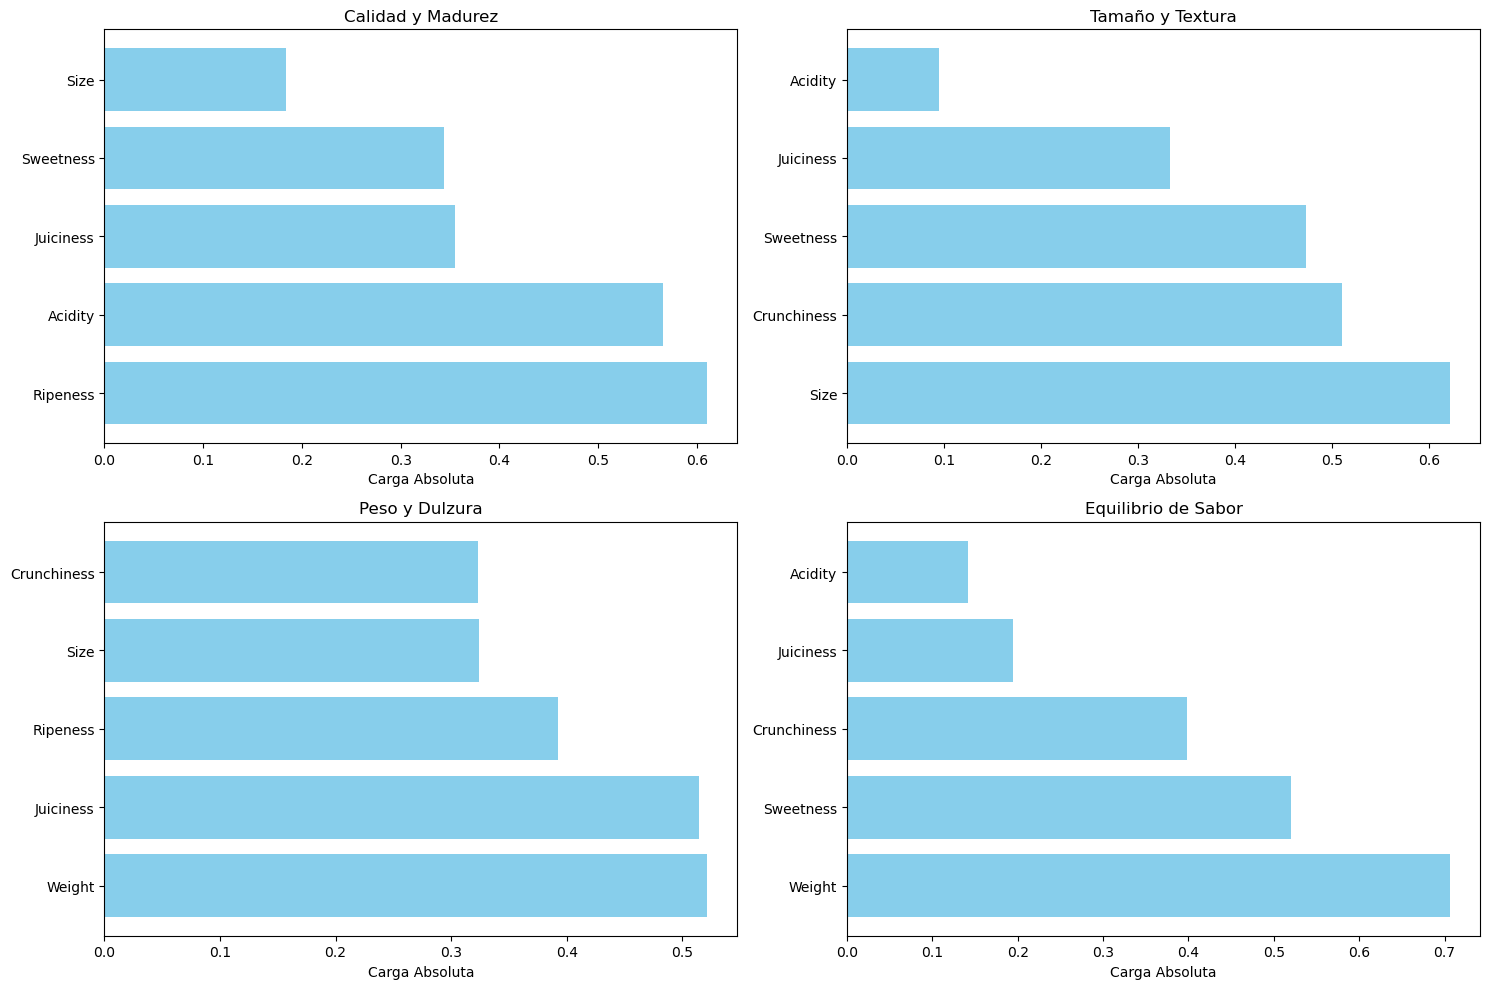

In [32]:
# Grafica importancia de cada variable en componentes
component_names = [
    'Calidad y Madurez',  # PC1
    'Tamaño y Textura',    # PC2
    'Peso y Dulzura',      # PC3
    'Equilibrio de Sabor'  # PC4
]

plt.figure(figsize=(15, 10))
for i in range(len(component_names)):
    plt.subplot(2, 2, i + 1)  
    top_vars = top_loadings[f'PC{i+1}']  
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'{component_names[i]}')

plt.tight_layout()
plt.show()

In [33]:
# Subdivisión DF PCA para modelos supervisados
X_train, X_test, y_train, y_test = train_test_split(principal_components, df['Quality'], test_size=0.2, random_state=42)

In [34]:
# Algoritmo regresión logistica
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicciones
y_pred_LogR = logistic_model.predict(X_test)

# Metricas
accuracy_logistic = accuracy_score(y_test, y_pred_LogR)
auc_logistic= roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_LogR)
classification_report_logistic = classification_report(y_test, y_pred_LogR)
print(accuracy_logistic)
print(auc_logistic )
print(confusion_matrix_logistic)
print(classification_report_logistic)

0.65
0.7148732179576123
[[272 129]
 [151 248]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       401
           1       0.66      0.62      0.64       399

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



0.68125
0.6812636328977055
[[271 130]
 [125 274]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       401
           1       0.68      0.69      0.68       399

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



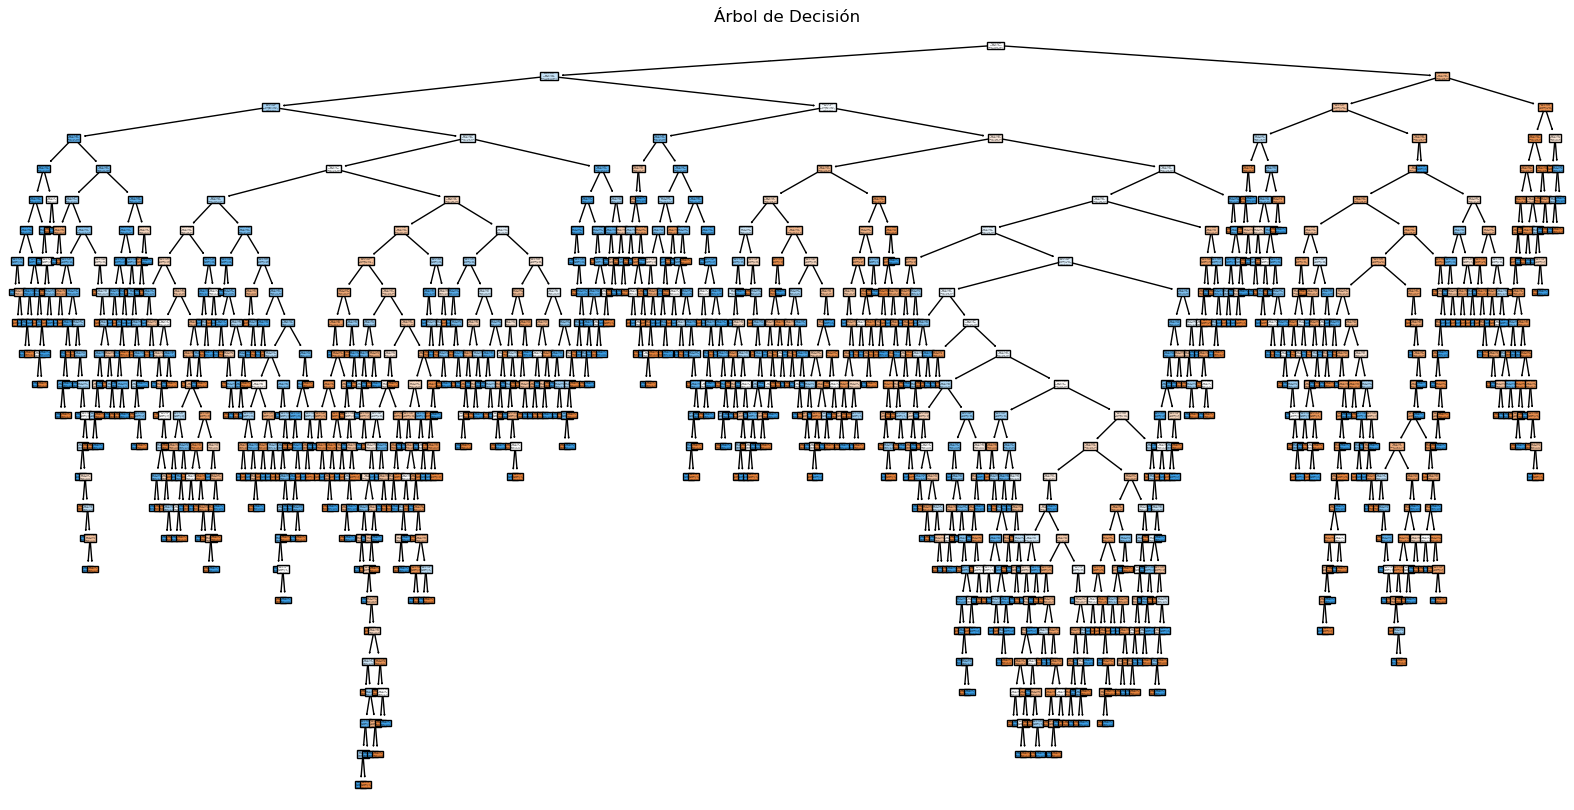

In [35]:
# Algoritmo árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicciones
y_pred_decisiontree = decision_tree.predict(X_test)

# Metricas
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
auc_decisiontree = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
confusion_matrix_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
classification_report_decisiontree = classification_report(y_test, y_pred_decisiontree)
print(accuracy_decisiontree)
print(auc_decisiontree )
print(confusion_matrix_decisiontree)
print(classification_report_decisiontree)

# Visualización arbol
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=[f'PC{i+1}' for i in range(principal_components.shape[1])], class_names=['Bad', 'Good'])
plt.title('Árbol de Decisión')
plt.show()

In [36]:
# Algoritmo XGBoost

# Division post manejo variable objetivo
X = principal_components  
y = df['Quality']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Clasificador XGBoost
xgb_classifier = XGBClassifier(random_state=42, tree_method='hist', device='cuda')
xgb_classifier.fit(X_train, y_train)

# Predicciones
xgb_y_pred = xgb_classifier.predict(X_test)

# Metricas
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])  # Usar probabilidades para AUC
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_classification_report = classification_report(y_test, xgb_y_pred)

print(xgb_accuracy)
print(xgb_auc)
print(xgb_confusion_matrix)
print(xgb_classification_report)

0.72875
0.8326614541340882
[[298 103]
 [114 285]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       401
           1       0.73      0.71      0.72       399

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



c:\Users\csolis\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:35:43] WARNING: D:\bld\xgboost-split_1727635034975\work\src\context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


C:\Users\csolis\AppData\Local\Temp\ipykernel_16412\981302491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
C:\Users\csolis\AppData\Local\Temp\ipykernel_16412\981302491.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=metrics_df, ax=ax[1], palette='viridis')


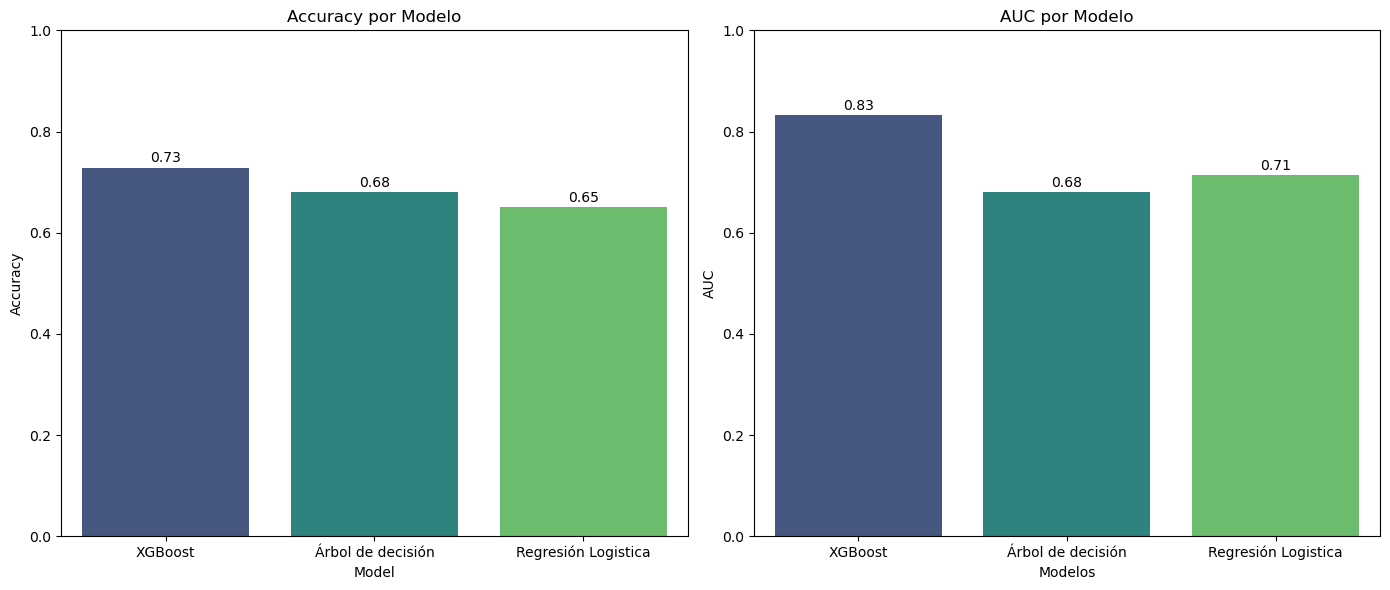

In [37]:
# Comparación Metricas
metrics = {
    'Model': ['XGBoost', 'Árbol de decisión', 'Regresión Logistica'],
    'Accuracy': [xgb_accuracy, accuracy_decisiontree, accuracy_logistic],
    'AUC': [xgb_auc, auc_decisiontree, auc_logistic]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

#Visualización
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de precisión
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
ax[0].set_title('Accuracy por Modelo')
ax[0].set_ylim(0, 1)  # Limitar el eje y entre 0 y 1
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Modelos')
for i in range(len(metrics_df)):
    ax[0].text(i, metrics_df['Accuracy'][i] + 0.01, f'{metrics_df["Accuracy"][i]:.2f}', ha='center')
# Gráfico de AUC
sns.barplot(x='Model', y='AUC', data=metrics_df, ax=ax[1], palette='viridis')
ax[1].set_title('AUC por Modelo')
ax[1].set_ylim(0, 1)  
ax[1].set_ylabel('AUC')
ax[1].set_xlabel('Modelos')
for i in range(len(metrics_df)):
    ax[1].text(i, metrics_df['AUC'][i] + 0.01, f'{metrics_df["AUC"][i]:.2f}', ha='center')
plt.tight_layout()
plt.show()


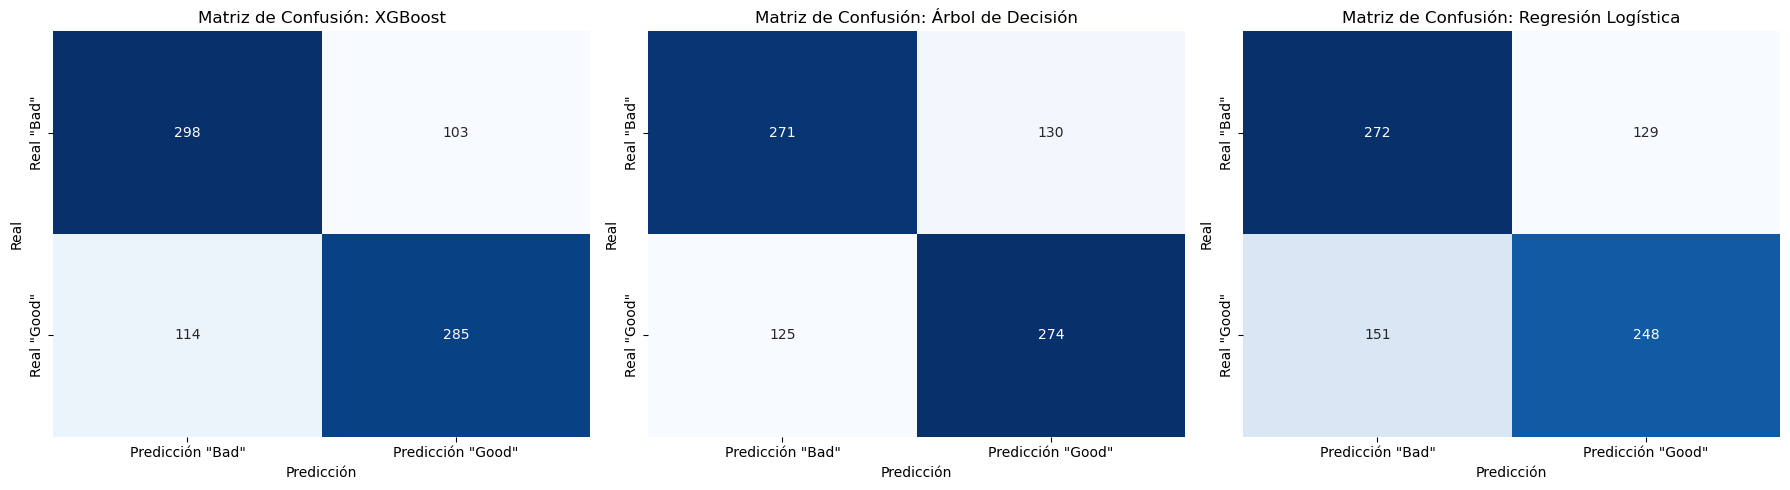

In [38]:
# Comparación Matriz  de confusión
def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicción "Bad"', 'Predicción "Good"'],
                yticklabels=['Real "Bad"', 'Real "Good"'], ax=ax)
    ax.set_title(f'Matriz de Confusión: {model_name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_confusion_matrix(axes[0], xgb_confusion_matrix, 'XGBoost')
plot_confusion_matrix(axes[1], confusion_matrix_decisiontree, 'Árbol de Decisión')
plot_confusion_matrix(axes[2], confusion_matrix_logistic, 'Regresión Logística')

plt.tight_layout() 
plt.show()

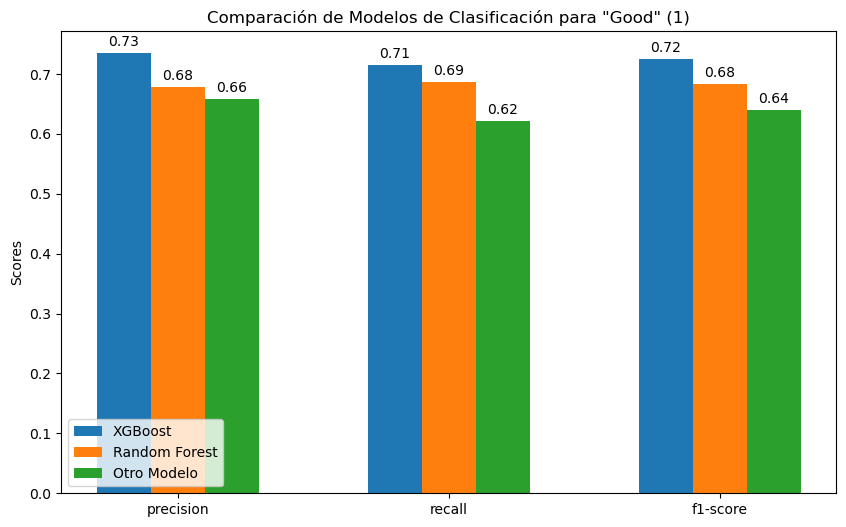

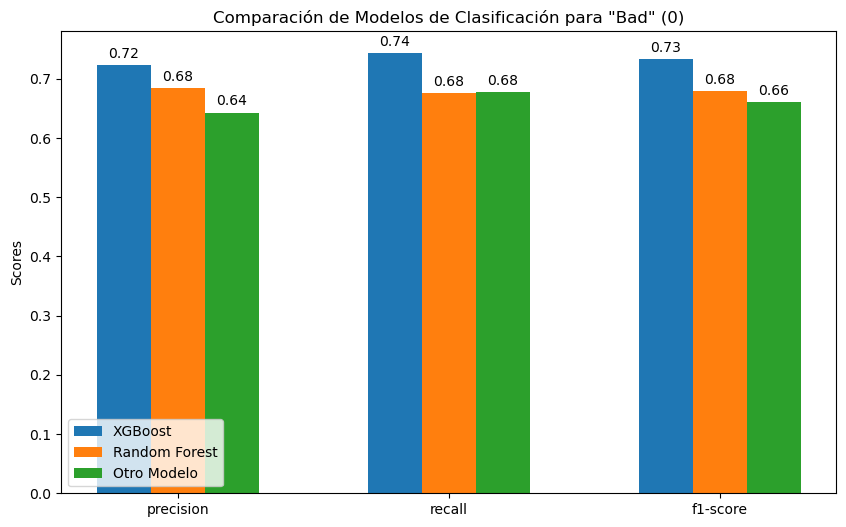

In [40]:
# Metricas especificas

report_xgb = classification_report(y_test, xgb_y_pred, output_dict=True)
report_rf = classification_report(y_test, y_pred_decisiontree, output_dict=True)
report_LogR = classification_report(y_test, y_pred_LogR, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
models = ['XGBoost', 'Random Forest', 'Regresión Logistica']

# Por clase
data = np.array([[report_xgb['1'][metric] for metric in metrics],
                 [report_rf['1'][metric] for metric in metrics],
                 [report_LogR['1'][metric] for metric in metrics]])

data_0 = np.array([[report_xgb['0'][metric] for metric in metrics],
                   [report_rf['0'][metric] for metric in metrics],
                   [report_LogR['0'][metric] for metric in metrics]])

# Fuga
x = np.arange(len(metrics)) 
width = 0.2  
fig, ax = plt.subplots(figsize=(10, 6))
bars_xgb = ax.bar(x - width, data[0], width, label='XGBoost')
bars_rf = ax.bar(x, data[1], width, label='Random Forest')
bars_other = ax.bar(x + width, data[2], width, label='Otro Modelo')
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación para "Good" (1)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars_xgb, bars_rf, bars_other]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

# Retención
fig, ax = plt.subplots(figsize=(10, 6))
bars_xgb_0 = ax.bar(x - width, data_0[0], width, label='XGBoost')
bars_rf_0 = ax.bar(x, data_0[1], width, label='Random Forest')
bars_other_0 = ax.bar(x + width, data_0[2], width, label='Otro Modelo')
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación para "Bad" (0)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars_xgb_0, bars_rf_0, bars_other_0]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

